# Importing Dependencies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = None
pd.options.display.max_rows = 90
%matplotlib inline
from sklearn.decomposition import PCA

# Understanding Data

In [2]:
data = pd.read_csv('houseprice.csv', index_col = 0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 80)

In [4]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
data.dtypes
# MSSubClass - Object

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [6]:
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['SoldDate'] = data['YrSold'].astype(str) + '-' + data['MoSold'].astype(str)
data['SoldDate'] = pd.to_datetime(data['SoldDate'])
data['GarageYrBlt'] = pd.to_numeric(data['GarageYrBlt'], errors = 'coerce')
data  = data.drop(columns=['MoSold','YrSold'], axis = 1)

In [7]:
data2 = data.copy()

# Filling Missing Values

In [8]:
data2.isna().sum()
# ffill categories
# Mean Categories - LotFrontage,
# Mode Categories - MasVnrType, MasVnrArea,BsmtExposure,Electrical,
# No Facility categories - Alley,BsmtQual,BsmtCond,BsmtFinType1, BsmtFinType2, 
# FireplaceQu, GarageType, GarageCond, PoolQC, Fence,MiscFeature


MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [9]:
# By Mean
for col in ['LotFrontage']:
    data2[col] = data2[col].fillna(data2[col].mean())
    
# By Mode
for col in ['MasVnrType','MasVnrArea','Electrical']:
    data2[col] = data2[col].fillna(data2[col].mode()[0])
    
# By Another Category - No Facility
for col in ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
            'GarageCond', 'PoolQC', 'Fence','MiscFeature','GarageCond','GarageQual','GarageFinish','GarageYrBlt']:
    data2[col] = data2[col].fillna('No Facility')
    

In [10]:
data2.isna().sum().sum()

0

In [11]:
data3 = data2.copy()

In [12]:
target = data3['SalePrice']
data3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,SoldDate
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No Facility,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Facility,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Facility,No Facility,No Facility,0,WD,Normal,208500,2008-02-01
2,20,RL,80.0,9600,Pave,No Facility,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Facility,No Facility,No Facility,0,WD,Normal,181500,2007-05-01
3,60,RL,68.0,11250,Pave,No Facility,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Facility,No Facility,No Facility,0,WD,Normal,223500,2008-09-01
4,70,RL,60.0,9550,Pave,No Facility,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Facility,No Facility,No Facility,0,WD,Abnorml,140000,2006-02-01
5,60,RL,84.0,14260,Pave,No Facility,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Facility,No Facility,No Facility,0,WD,Normal,250000,2008-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,No Facility,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Facility,No Facility,No Facility,0,WD,Normal,175000,2007-08-01
1457,20,RL,85.0,13175,Pave,No Facility,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Facility,MnPrv,No Facility,0,WD,Normal,210000,2010-02-01
1458,70,RL,66.0,9042,Pave,No Facility,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0

# Encoding

In [13]:
# data3 = pd.get_dummies(drop_first=True,data=data3)

In [19]:
# data3 = data3.drop('SalePrice', axis=1)
data3 = data3.drop(['SoldDate'], axis=1)

In [20]:
data4 = data3.copy()
numeric_data = data4.select_dtypes(include=[np.number])

# Standarising

In [21]:
scaler = StandardScaler()

In [22]:
scaled_d = scaler.fit(numeric_data)

In [26]:
data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data))

In [27]:
cov_mat = np.cov(data_scaled)
print(cov_mat[0:5])

[[ 0.39048151 -0.2040632   0.26715473 ... -0.08658148 -0.20416326
  -0.13688377]
 [-0.2040632   0.9153587  -0.18782975 ...  0.05325713  0.03979885
   0.2504859 ]
 [ 0.26715473 -0.18782975  0.29781399 ... -0.02943076 -0.23141878
  -0.21123055]
 [-0.03637356 -0.20715495 -0.00474215 ... -0.02048664  0.08226993
  -0.25756608]
 [ 0.2978992  -0.19576019  0.25317735 ... -0.09560198 -0.36451145
  -0.09140646]]


In [28]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('Eigenvalues:','\n','\n', eig_val,"\n")
print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [ 1.79532566e+02+0.00000000e+00j  1.37949787e+02+0.00000000e+00j
  8.71997240e+01+0.00000000e+00j ... -5.11970827e-18-6.24699342e-17j
 -5.48679507e-17+1.42150778e-17j -5.48679507e-17-1.42150778e-17j] 

Eigenvectors: 
 
 [[-1.58093931e-02+0.j          1.35056077e-02+0.j
  -4.16543101e-02+0.j         ... -5.30080099e-03-0.01301665j
   2.48258814e-03+0.00868599j  2.48258814e-03-0.00868599j]
 [ 1.11468260e-02+0.j         -2.21180798e-02+0.j
  -3.59907583e-03+0.j         ...  1.03782988e-03+0.00133796j
   4.21215279e-04-0.0007221j   4.21215279e-04+0.0007221j ]
 [-1.77170781e-02+0.j          1.05653058e-02+0.j
  -3.45114078e-02+0.j         ... -7.29299248e-04-0.00143869j
  -2.19809632e-03+0.00085554j -2.19809632e-03-0.00085554j]
 ...
 [ 2.06186949e-02+0.j          3.64234513e-02+0.j
  -2.11030845e-06+0.j         ... -1.22483942e-02+0.00347952j
  -1.99245204e-02+0.01299863j -1.99245204e-02-0.01299863j]
 [ 3.82495092e-02+0.j         -4.57578876e-02+0.j
  -8.87580374e-03+0.j   

In [29]:
eig_val = list(eig_val)
eig_val.sort(reverse = True)
print(eig_val)


[(179.53256641671516+0j), (137.94978695477977+0j), (87.19972401079195+0j), (81.88547055792675+0j), (59.90681406406557+0j), (51.32961609634127+0j), (51.031975501581385+0j), (49.14227234292082+0j), (46.881562726268335+0j), (46.1723237010273+0j), (44.84538994647462+0j), (44.34508376929578+0j), (41.554836791241186+0j), (39.84545847947838+0j), (38.54723443642495+0j), (35.47774317795523+0j), (33.95036264334755+0j), (31.78771010999419+0j), (29.26894913621292+0j), (28.063240984414957+0j), (24.96158203111417+0j), (21.59611250032943+0j), (14.988193339904402+0j), (14.667956534882393+0j), (12.4016417722334+0j), (9.217093266050044+0j), (7.428430953980369+0j), (6.7426390884991+0j), (6.024560684011684+0j), (4.540734662259789+0j), (1.5758826882129637+0j), (5.294368673126407e-15+6.433068988314041e-16j), (5.294368673126407e-15-6.433068988314041e-16j), (5.108615264330744e-15+0j), (4.9309547152849745e-15+8.645466588826241e-16j), (4.9309547152849745e-15-8.645466588826241e-16j), (4.546410823545863e-15+0j), 

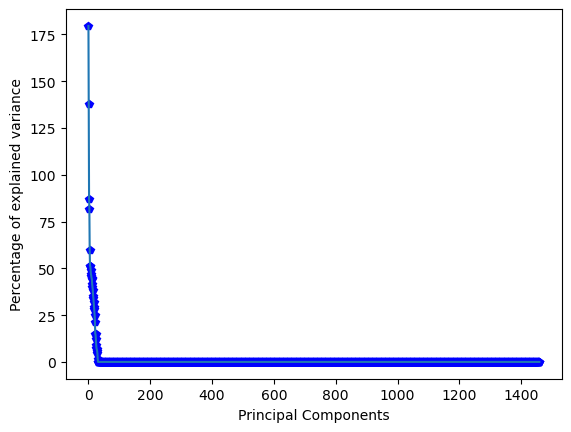

In [30]:
import matplotlib.pyplot as plt
plt.plot(eig_val,'bp')            
plt.plot(eig_val) 
plt.xlabel('Principal Components')    
plt.ylabel('Percentage of explained variance')      
plt.show()   

# Applying PCA

In [ ]:
pca = PCA(n_components=10, random_state=0)  
PrincipalComponents = pca.fit_transform(data4)

In [ ]:
PrincipalComponents

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance